## Практическое задание

1. Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните качество классификации по отложенной выборке.

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [22]:
# Загрузка датасета IRIS
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X.shape)

(150, 4)


In [24]:
def pca(X, n_components):
    # Центрирование данных
    X = X - np.mean(X, axis=0)
    # Вычисление матрицы ковариации данных
    cov_matrix = np.cov(X.T)
    # Вычисление сингулярного разложения матрицы ковариации данных
    U, S, V = np.linalg.svd(cov_matrix)
    # Сортировка сингулярных значений в порядке убывания и соответствующих им сингулярных векторов
    idx = np.argsort(-S)
    U = U[:, idx]
    S = S[idx]
    # Выбор наиболее значимых сингулярных векторов
    U_reduced = U[:, :n_components]
    # Умножение матрицы данных на выбранные сингулярные векторы
    X_reduced = np.dot(X, U_reduced)
    return X_reduced

In [25]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Обучение модели k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Предсказания на тестовой выборке
y_pred = knn.predict(X_test_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


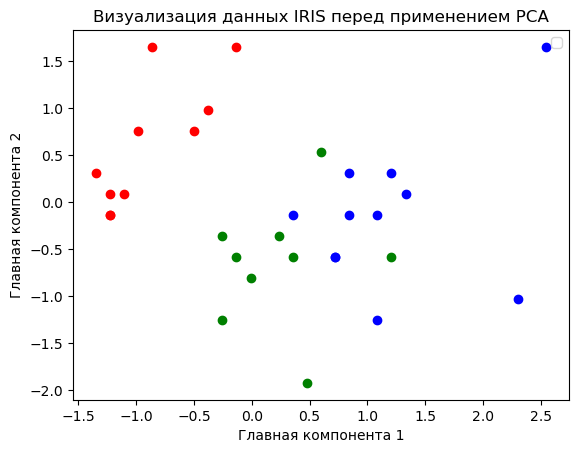

In [37]:
# Визуализация результатов на тестовой выборке перед применением PCA
for c, i, label in zip("rgb", [0, 1, 2], iris.target_names):
    plt.scatter(X_test_scaled[y_test == i, 0], X_test_scaled[y_test == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend()
plt.title('Визуализация данных IRIS перед применением PCA')
plt.show()

In [28]:
# Оценка качества классификации
accuracy_before_pca = accuracy_score(y_test, y_pred)
print(f"Точность классификации без применения PCA: {accuracy_before_pca:.4f}")

Точность классификации без применения PCA: 1.0000


In [33]:
# Применение PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Обучение модели k-NN на данных после применения PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Предсказания на тестовой выборке
y_pred_pca = knn_pca.predict(X_test_pca)

# Оценка качества классификации
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)
print(f"Точность классификации после применения PCA: {accuracy_after_pca:.4f}")

Точность классификации после применения PCA: 0.9333


In [29]:
X_reduced = pca(X, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


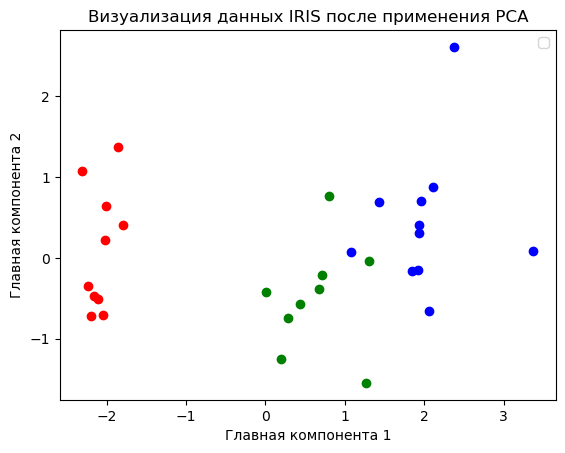

In [39]:
# Визуализация результатов после применения PCA
for c, i, label in zip("rgb", [0, 1, 2], iris.target_names):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend()
plt.title('Визуализация данных IRIS после применения PCA')
plt.show()

In [40]:
# Сравнение результатов
print(f"Точность классификации без применения PCA: {accuracy_before_pca:.4f}")
print(f"Точность классификации после применения PCA: {accuracy_after_pca:.4f}")

Точность классификации без применения PCA: 1.0000
Точность классификации после применения PCA: 0.9333


Применение PCA в данной задаче классификации IRIS показало, что хотя PCA может немного снизить точность модели, оно также способствует упрощению модели и может быть полезным для визуализации данных и понимания их структуры. Важно балансировать между уменьшением размерности и сохранением достаточной информации для успешной классификации.

2. Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [41]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [42]:
# 1. Загрузка данных
iris = load_iris()
X = iris.data

In [43]:
# 2. Центрирование данных
X_centered = X - np.mean(X, axis=0)

In [44]:
# 3. Применение SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

In [45]:
# 4. Выбор количества главных компонент (например, 2)
n_components = 2
W = Vt.T[:, :n_components]

In [46]:
# 5. Преобразование данных
X_pca = X_centered @ W

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


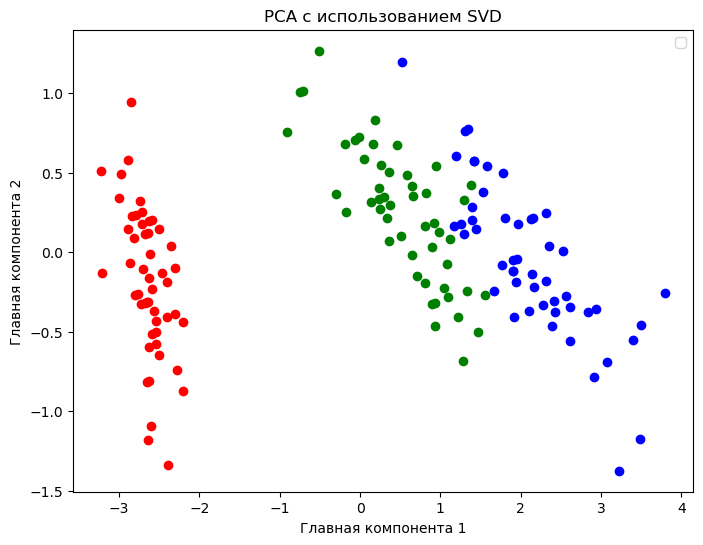

In [49]:
# 6. Визуализация результатов
plt.figure(figsize=(8, 6))
for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend()
plt.title('PCA с использованием SVD')
plt.show()

In [48]:
# 7. Вывод собственных значений для анализа
explained_variance = (S**2) / (len(X) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()
print("Доля объясненной дисперсии каждой компонентой:", explained_variance_ratio)

Доля объясненной дисперсии каждой компонентой: [0.92461872 0.05306648 0.01710261 0.00521218]
